In [256]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import glob
from sklearn import tree

# cleaning data-----------------------------------
def load_data(filename):
    print(filename)

    with open(filename) as file:
        reader = csv.reader(file)
        data = []
        for row in reader:
            entry = []
            for attr in row:
                entry.append(attr)
            data.append(entry)
        r_data = remove_header(data)
        print("column", len(r_data[0]))
        print("row", len(r_data))
    return r_data
#remove header--------------
def remove_header(data):
    print(data[0])
    del data[0]
    return data

In [257]:
#read data----------------------------
raw_data = []
raw_data = load_data("./data/dataset/dataset_2.csv")
#raw_data = load_data("./data/dataset/1.csv")

csvfile_name = "perdiction_6"

./data/dataset/dataset_2.csv
['Train_y', 'Train_x', '']
column 3
row 117


In [258]:
# predicit/empty score------------------------------------
X_submission = load_data("./data/test/test_1.csv")
Predict = []
true_score = []

for row in X_submission:
    entry = [row[1]]
    Predict.append(entry)
    #print(Predict)
for row in X_submission:
    entry = str(row[2])
    true_score.append(entry)
    #print(entry)
print(len(true_score))



./data/test/test_1.csv
['predicted_score', 'Test_x', 'Test_y']
column 3
row 8
8


In [259]:
# split train data and test data from X_train----------------------------
def split_data(raw_data, splite_rate, test_rate):
    raw_train, _ = train_test_split(raw_data, test_size= 1-splite_rate)
    X = []
    y = []
    for row in raw_data:
        entry = [row[1]]
        X.append(entry)
        y.append((row[0]))
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= test_rate)
    return train_X, test_X, train_y, test_y

Train_X, TestX, Train_y ,Testy = split_data(raw_data, 0.1, 0.2)


In [260]:
#extract text from Train_X, TestX, predict-------------------------------
def extract_text(Train_X, TestX, Predict):
    Train_text = []
    for row in Train_X:
        Train_text.append(row[0])

    Test_text = []
    for row in TestX:
        Test_text.append(row[0])

    Predict_text = []
    for row in Predict:
        Predict_text.append(row[0])
    # print(Test_text)
    # combine Train and Predict Text for vectorize
    combine_text = Train_text + Test_text + Predict_text
    shuffle(combine_text)
    return Train_text, Test_text, Predict_text, combine_text

Train_text, Test_text, Predict_text,combine_text = extract_text(Train_X, TestX, Predict)



In [261]:
# vectorizing---------------------------
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
vectorizer.fit(combine_text)
train_vec = vectorizer.transform(Train_text)
test_vec = vectorizer.transform(Test_text)
predict_vec = vectorizer.transform(Predict_text)

In [262]:
#Calculate accuracy------------------------
def accuracy_cal(predict_y, true_score):
    count = 0
    for i in range(len(predict_y)):
        if predict_y[i] == true_score[i]:
            count+=1
    accuracy = round(count / len(predict_y) * 100, 4)
    print('accuracy:', accuracy,'%')
    return accuracy

# write csv file------------------------
def output_csv(filename, model, predict, predict_y, true_score, accuracy):
    path  = filename + ".csv"
    with open(path,'a+', newline='') as file:
        csv_write = csv.writer(file)
        csv_write.writerow(["model_name", "predicted_score", "code", "true_score", "accuracy"])
        for i in range(len(predict)):
            entry = [model, predict_y[i], predict[i][0], true_score[i], accuracy]
            csv_write.writerow(entry)



In [263]:
#Logistic Regression
print("Logistic Regression")
classifier = linear_model.LogisticRegression(n_jobs=-1)
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
accur = accuracy_cal(classifier.predict(predict_vec), true_score)
output_csv(csvfile_name, "Log_Reg", Predict, classifier.predict(predict_vec),true_score, accur)


Logistic Regression
accuracy: 37.5 %


In [264]:
#Naive Bayes
print("Naive Bayes")
classifier = []
prediction = []
accuracy = []

classifier = naive_bayes.MultinomialNB()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
accur = accuracy_cal(classifier.predict(predict_vec), true_score)
output_csv(csvfile_name, "Nav_Bay", Predict, classifier.predict(predict_vec),true_score, accur)

Naive Bayes
accuracy: 37.5 %


In [265]:
#KNN
print("KNN")
classifier = []
prediction = []
accuracy = []

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
accur = accuracy_cal(classifier.predict(predict_vec), true_score)
output_csv(csvfile_name, "KNN", Predict, classifier.predict(predict_vec),true_score, accur)

KNN
accuracy: 37.5 %


In [266]:
#SVM
print("SVM")
classifier = []
prediction = []
accuracy = []

classifier = svm.SVC()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
accur = accuracy_cal(classifier.predict(predict_vec), true_score)
output_csv(csvfile_name, "SVM", Predict, classifier.predict(predict_vec),true_score, accur)

SVM
accuracy: 75.0 %


In [267]:
#Decison Tree
print("Decison Tree")
classifier = []
prediction = []
accuracy = []

classifier = tree.DecisionTreeClassifier()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
accur = accuracy_cal(classifier.predict(predict_vec), true_score)
output_csv(csvfile_name, "Dec_Tre", Predict, classifier.predict(predict_vec),true_score, accur)

Decison Tree
accuracy: 75.0 %


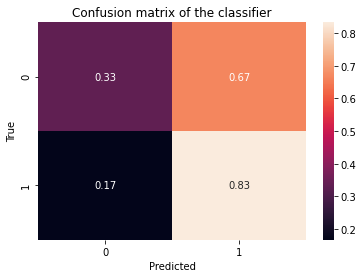

In [268]:
# Plot a confusion matrix
cm = confusion_matrix(Testy, prediction, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()